In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/new_york_listings_2024.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


# Exploratory Data Analysis

In [ ]:
housingcolumnnames = ['neighbourhood_group',
                      'room_type',
                      'minimum_nights',
                      'number_of_reviews',
                      'reviews_per_month',
                      'calculated_host_listings_count',
                      'rating',
                      'bedrooms',
                      'beds',
                      'baths']
housingtargetname = ['price']

In [ ]:
df.shape

(20758, 22)

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.075800e+04,2.075800e+04,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,3.034044e+17,1.749316e+08,40.726798,-73.939161,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,10.852105,1.723721
std,3.901216e+17,1.725541e+08,0.060294,0.061403,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,21.357071,1.212272
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.708808e+07,2.041738e+07,40.684150,-73.980710,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.993003e+07,1.087271e+08,40.722820,-73.949587,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.216019e+17,3.144102e+08,40.763098,-73.917460,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.054376e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


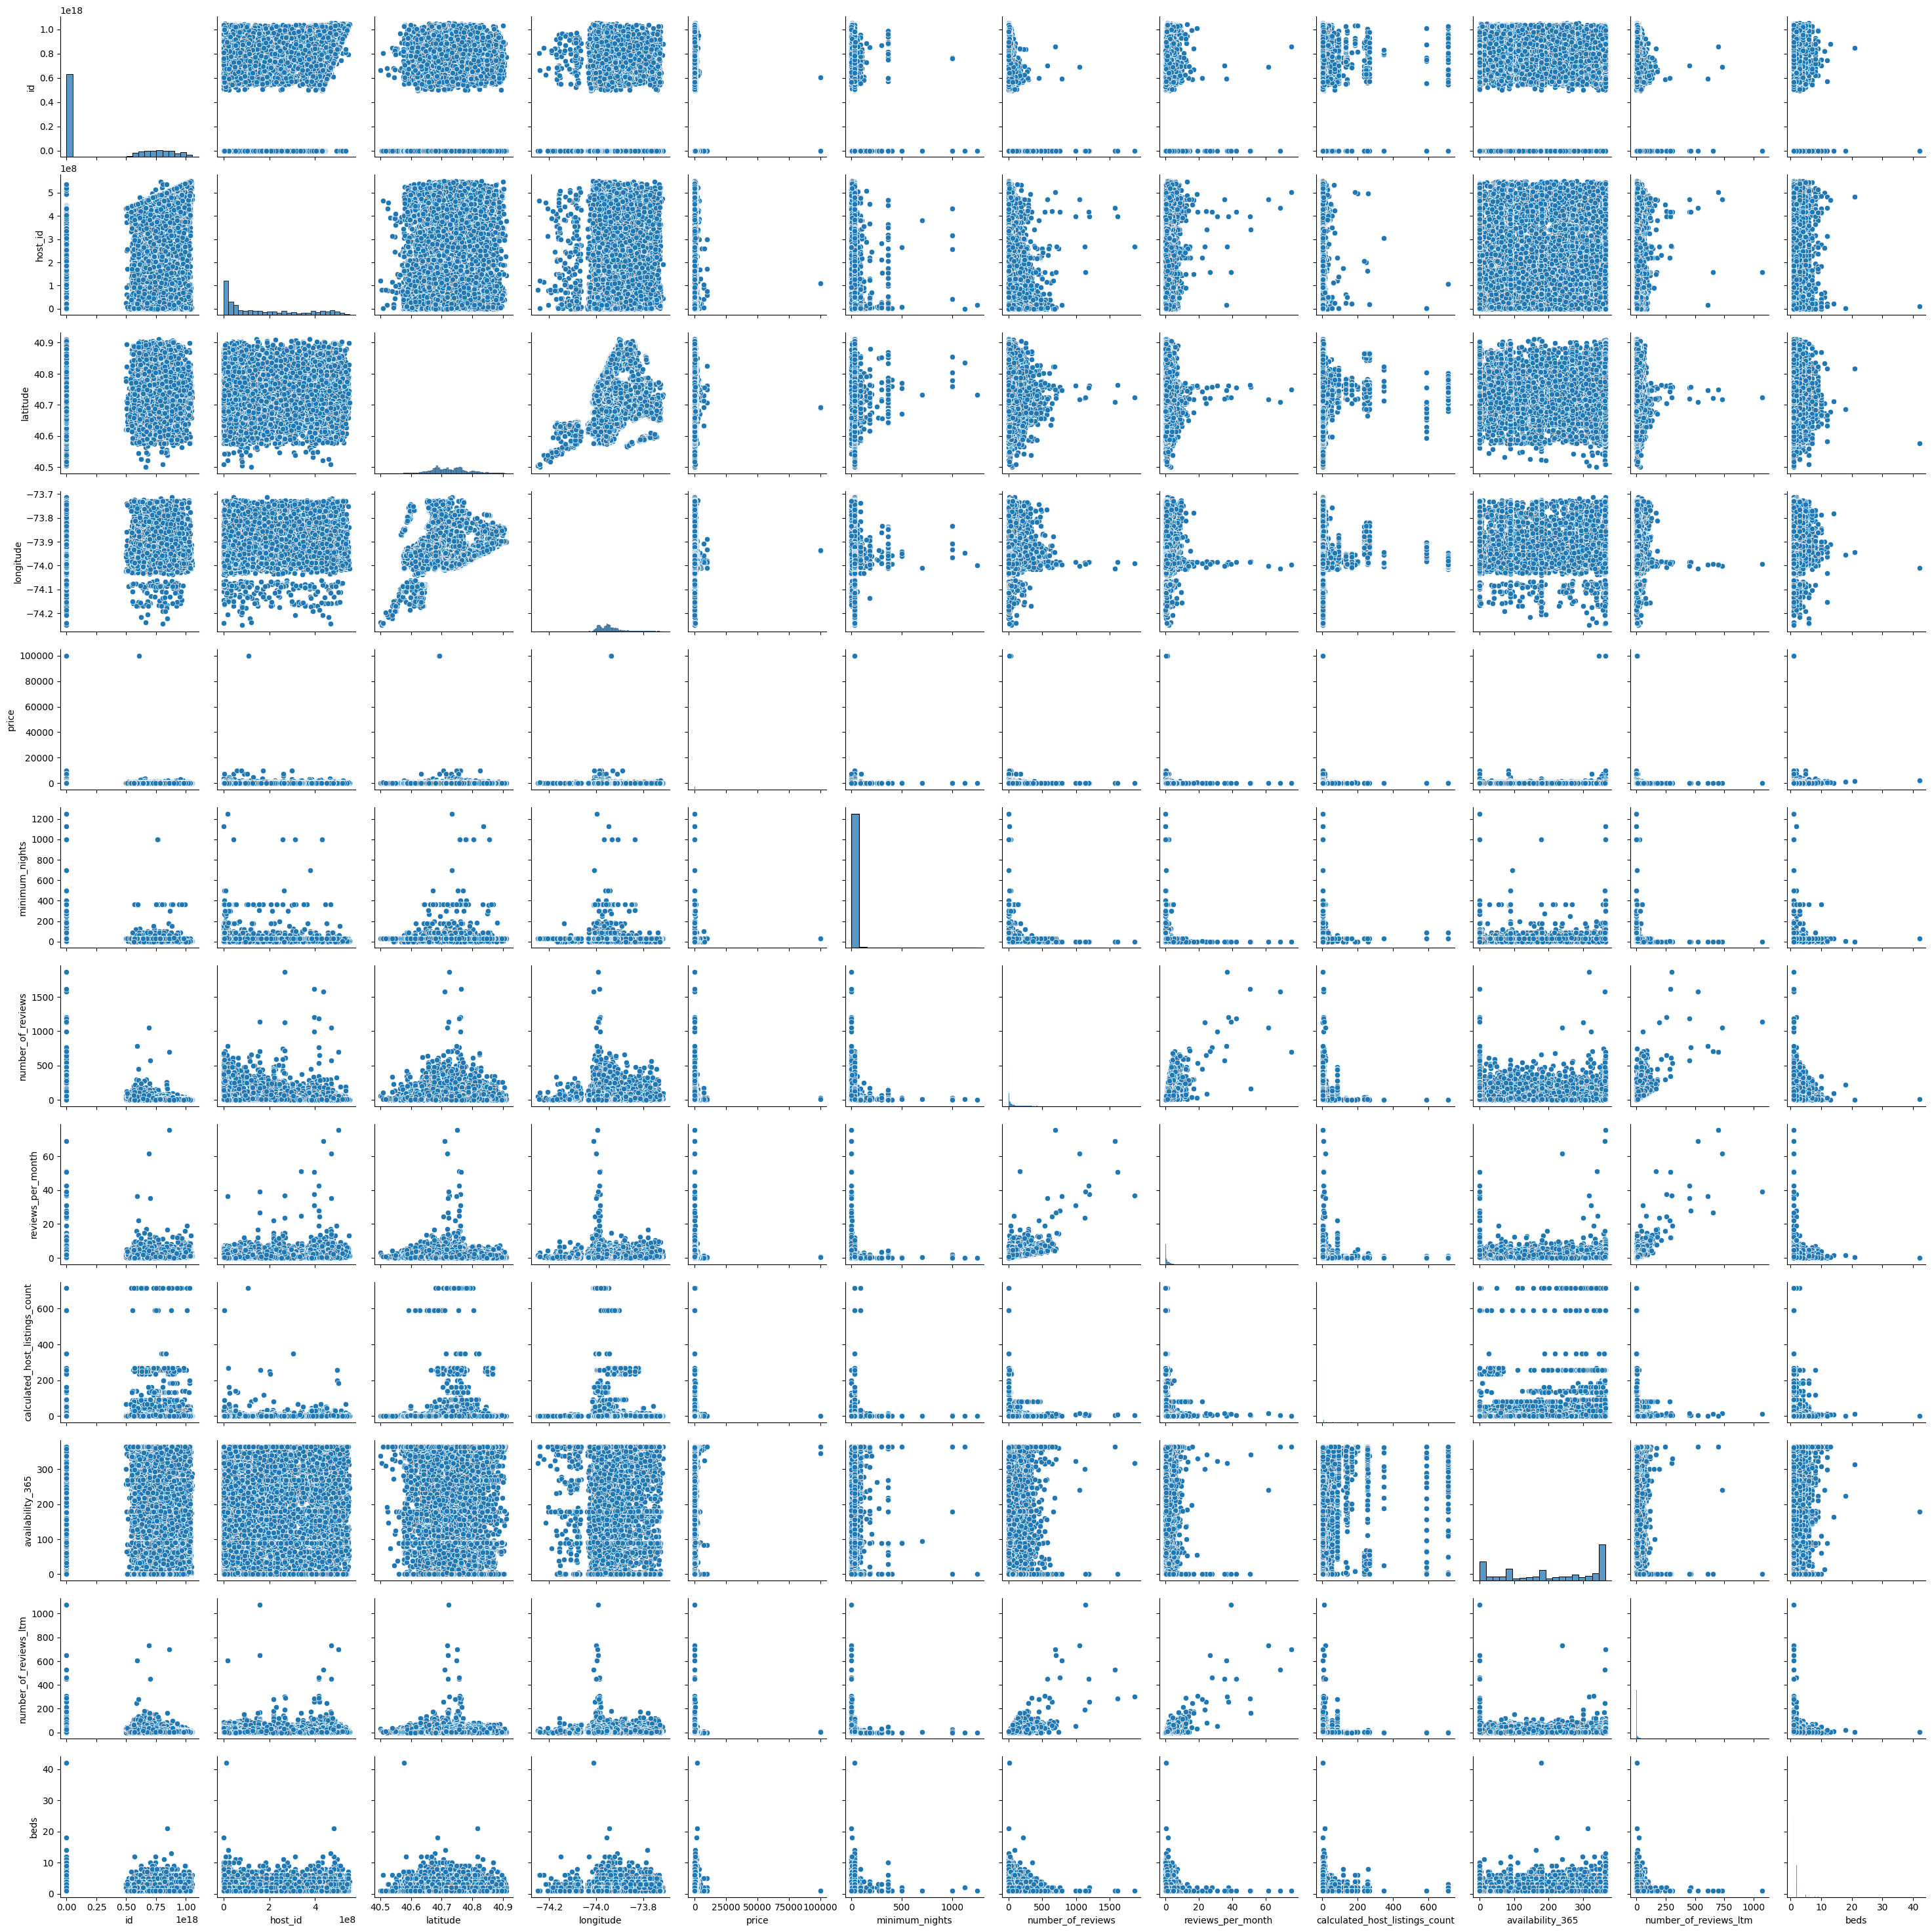

In [ ]:
sns.pairplot(df)

<ipython-input-7-499a2243a585>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, square=True)


<Axes: >

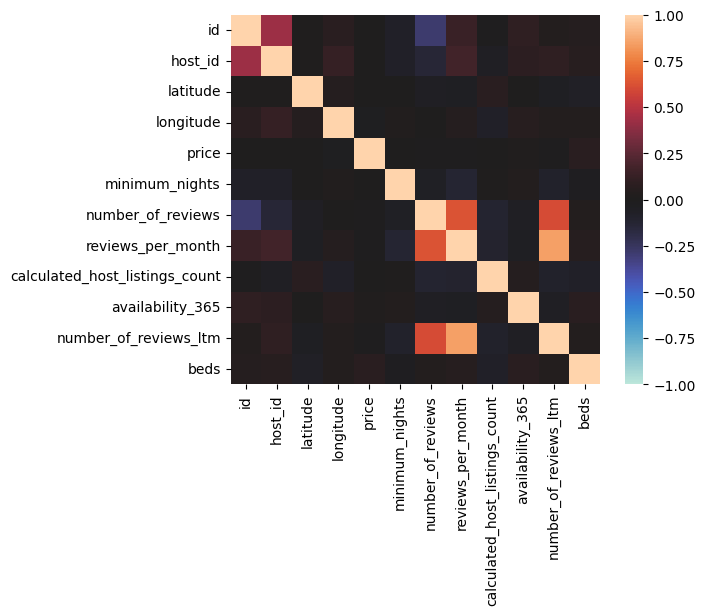

In [ ]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, square=True)
# add "annot=True," to see actual values

# Target Variable

In [ ]:
df['price'].describe()

count     20758.000000
mean        187.776616
std        1022.797208
min          10.000000
25%          80.000000
50%         125.000000
75%         199.000000
max      100000.000000
Name: price, dtype: float64

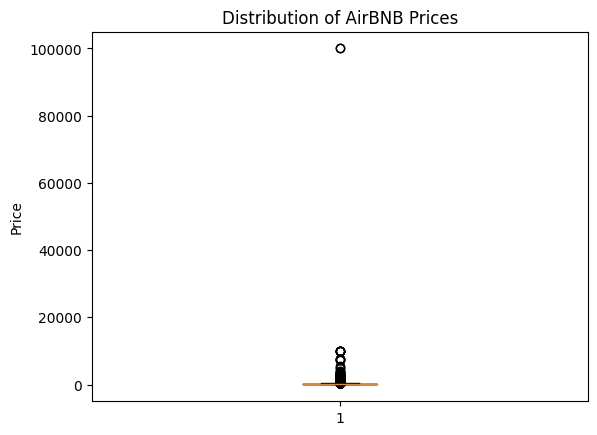

In [ ]:
plt.boxplot(df['price'])
plt.ylabel('Price')
plt.title('Distribution of AirBNB Prices')

plt.show()

### Scatterplots for Variables' Relationships with Price

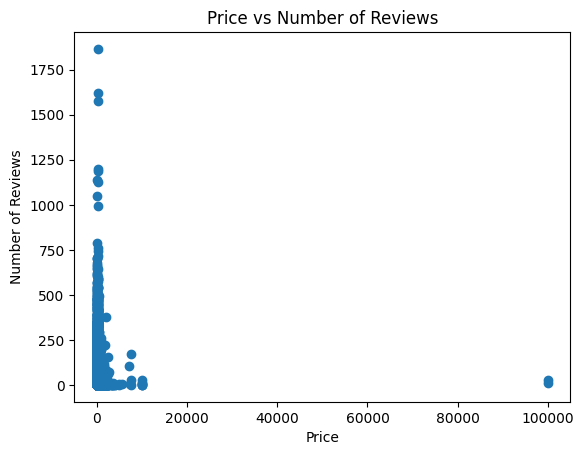

In [ ]:
plt.scatter(df['price'], df['number_of_reviews'])
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Price vs Number of Reviews')

plt.show()

# Exploring Data

In [ ]:
null_counts = df.isnull().sum()
null_counts

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [ ]:
# This is a list of all of the columns in our dataset (features + target)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths'],
      dtype='object')

In [ ]:
# This is the number of unique values in each column
unique_counts = df.nunique()
unique_counts

id                                20758
name                               9836
host_id                           12449
host_name                          5815
neighbourhood_group                   5
neighbourhood                       221
latitude                          15382
longitude                         14477
room_type                             4
price                               785
minimum_nights                       69
number_of_reviews                   470
last_review                        1878
reviews_per_month                   783
calculated_host_listings_count       68
availability_365                    366
number_of_reviews_ltm               153
license                             879
rating                              162
bedrooms                             12
beds                                 17
baths                                17
dtype: int64

In [ ]:
# This is the type of value associated with each column
column_types = df.dtypes
column_types

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

In [ ]:
# This is a list of all the unique values for the categorical / object type data
categorical_cols = ["name", "host_name", "neighbourhood_group", "room_type", "last_review", "rating", "bedrooms", "baths"]
unique_values = {col: df[col].unique() for col in categorical_cols}
unique_values

{'name': array(['Rental unit in Brooklyn · ★5.0 · 1 bedroom',
        'Rental unit in New York · ★4.67 · 2 bedrooms · 1 bed · 1 bath',
        'Rental unit in New York · ★4.17 · 1 bedroom · 2 beds · 1 bath',
        ...,
        'Rental unit in New York · ★4.47 · 2 bedrooms · 2 beds · 1 bath',
        'Rental unit in New York · ★5.0 · 1 bedroom',
        'Rental unit in New York · ★4.46 · 1 bedroom · 2 beds · 1 bath'],
       dtype=object),
 'host_name': array(['Walter', 'Jeniffer', 'Joshua', ..., 'Henry D', 'Aspen', 'Glenroy'],
       dtype=object),
 'neighbourhood_group': array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
       dtype=object),
 'room_type': array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
       dtype=object),
 'last_review': array(['2015-12-20', '2023-05-01', '2023-12-18', ..., '2015-12-13',
        '2018-03-15', '2019-07-11'], dtype=object),
 'rating': array(['5.0 ', '4.67 ', '4.17 ', '4.64 ', '4.91 ', '4.33 ', '4.50 ',
    

## Data Cleaning

In [ ]:
# drop feature columns we are not using
df.drop(columns=['id', 'name', 'host_id', 'latitude', 'longitude'], inplace=True)
df

,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,Walter,Brooklyn,Clinton Hill,Private room,55.0,30,3,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,Jeniffer,Manhattan,Hell's Kitchen,Entire home/apt,144.0,30,9,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,Joshua,Manhattan,Chelsea,Entire home/apt,187.0,2,6,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,John And Catherine,Manhattan,Washington Heights,Private room,120.0,30,156,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,Stay With Vibe,Manhattan,Murray Hill,Entire home/apt,85.0,30,11,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Henry D,Manhattan,Lower East Side,Private room,45.0,30,124,2023-09-29,1.81,1,157,12,No License,4.75,1,1,1
20754,Aspen,Manhattan,Greenwich Village,Entire home/apt,105.0,30,56,2023-07-01,0.48,1,0,1,No License,4.46,1,2,1
20755,Jeff,Manhattan,Hell's Kitchen,Entire home/apt,299.0,30,60,2023-12-08,2.09,1,0,27,No License,4.93,1,1,1
20756,Marissa,Manhattan,Chinatown,Entire home/apt,115.0,30,7,2023-09-17,0.91,1,363,7,No License,5.0,1,1,1


In [ ]:
# get count of studio string in bedrooms column
studio_count = df['bedrooms'].value_counts().get('Studio')
studio_count

1815

In [ ]:
notspecified_baths = df['baths'].value_counts().get('Not specified')
notspecified_baths

13

In [ ]:
df = df[df.baths != 'Not specified']
notspecified_baths = df['baths'].value_counts().get('Not specified', 0)
notspecified_baths

0

In [ ]:
noratings = df['rating'].value_counts().get('No rating')
noratings

3589

In [ ]:
# replacing new with null so we can impute
df.replace('New ', np.nan, inplace=True)
new_count = df['rating'].value_counts().get('New ', 0)
new_count

<ipython-input-21-f503181768fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('New ', np.nan, inplace=True)


0

In [ ]:
# replacing no rating with null so we can impute
df.replace('No rating', np.nan, inplace=True)
no_ratings_count = df['rating'].value_counts().get('No rating', 0)
no_ratings_count

<ipython-input-22-57812b814dec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('No rating', np.nan, inplace=True)


0

In [ ]:
# converting rating column to float
df['rating'] = df['rating'].astype(float)

# imputing new and no rating values with median of the column
df['rating'] = df['rating'].fillna(df['rating'].median())
df['rating'].describe()

<ipython-input-23-e4d81d87d8be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].astype(float)
<ipython-input-23-e4d81d87d8be>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].fillna(df['rating'].median())


count    20745.000000
mean         4.747933
std          0.268073
min          1.750000
25%          4.680000
50%          4.810000
75%          4.910000
max          5.000000
Name: rating, dtype: float64

In [ ]:
# number of nulls in ratings column should now be zero
print(df['rating'].isna().sum())

0


# Distribution of Categorical Features

In [ ]:
df

,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
1,Jeniffer,Manhattan,Hell's Kitchen,Entire home/apt,144.0,30,9,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,Joshua,Manhattan,Chelsea,Entire home/apt,187.0,2,6,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,John And Catherine,Manhattan,Washington Heights,Private room,120.0,30,156,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,Stay With Vibe,Manhattan,Murray Hill,Entire home/apt,85.0,30,11,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1
5,Jeniffer,Manhattan,Hell's Kitchen,Entire home/apt,115.0,30,5,2023-07-29,0.16,139,276,2,No License,5.00,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Henry D,Manhattan,Lower East Side,Private room,45.0,30,124,2023-09-29,1.81,1,157,12,No License,4.75,1,1,1
20754,Aspen,Manhattan,Greenwich Village,Entire home/apt,105.0,30,56,2023-07-01,0.48,1,0,1,No License,4.46,1,2,1
20755,Jeff,Manhattan,Hell's Kitchen,Entire home/apt,299.0,30,60,2023-12-08,2.09,1,0,27,No License,4.93,1,1,1
20756,Marissa,Manhattan,Chinatown,Entire home/apt,115.0,30,7,2023-09-17,0.91,1,363,7,No License,5.00,1,1,1


### Neighbourhood Group

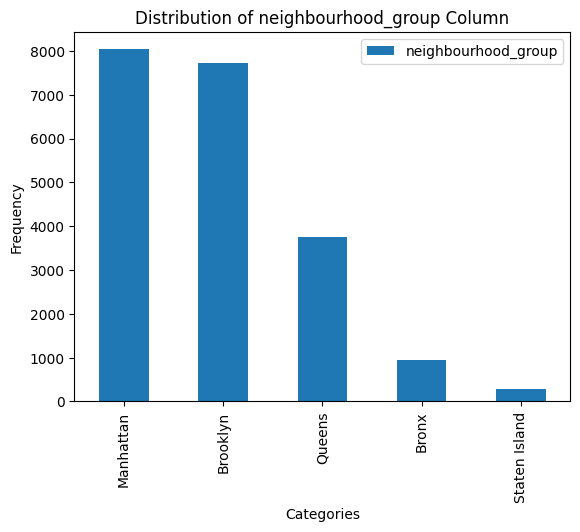

In [ ]:
df["neighbourhood_group"].value_counts().plot(kind='bar', legend=True)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title(f'Distribution of neighbourhood_group Column')
plt.show()


### Room Type

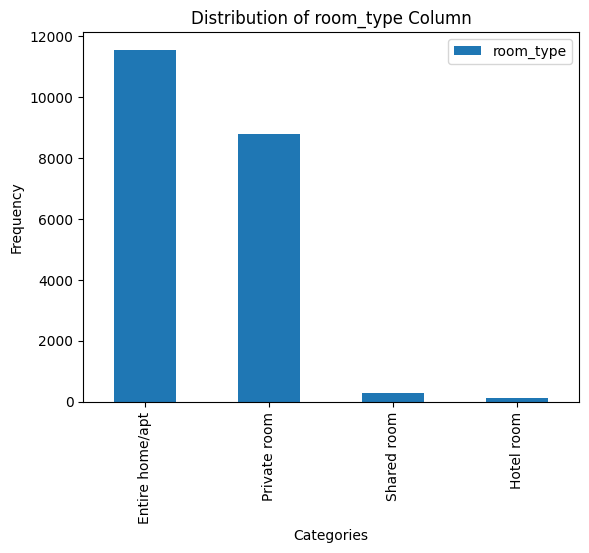

In [ ]:
df["room_type"].value_counts().plot(kind='bar', legend=True)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title(f'Distribution of room_type Column')
plt.show()

In [ ]:
encoded_neighborhoodgroup_df = pd.get_dummies(df, columns=['room_type'])
df = encoded_neighborhoodgroup_df.copy()

### Neighbourhood

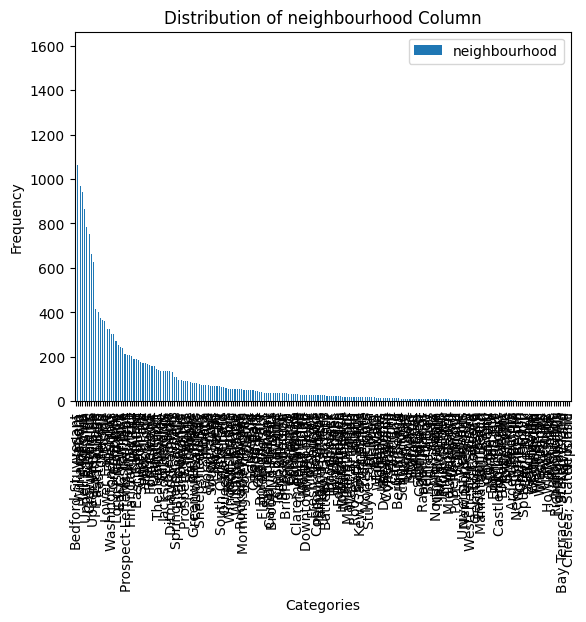

In [ ]:
df["neighbourhood"].value_counts().plot(kind='bar', legend=True)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title(f'Distribution of neighbourhood Column')
plt.show()

### Rating

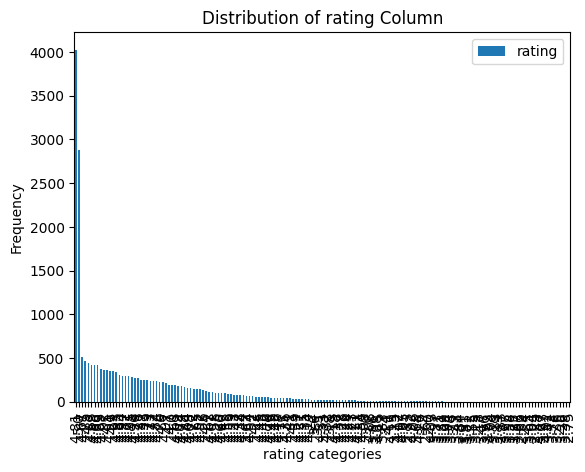

In [ ]:
df["rating"].value_counts().plot(kind='bar', legend=True)
plt.xlabel('rating categories')
plt.ylabel('Frequency')
plt.title(f'Distribution of rating Column')
plt.show()

### Bedrooms

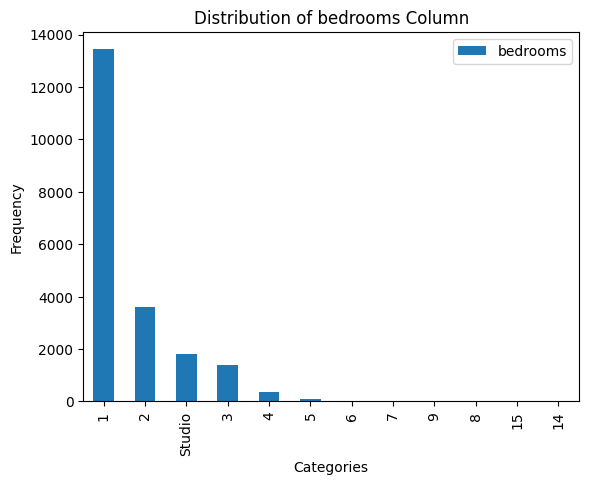

In [ ]:
df["bedrooms"].value_counts().plot(kind='bar', legend=True)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title(f'Distribution of bedrooms Column')
plt.show()

### Baths


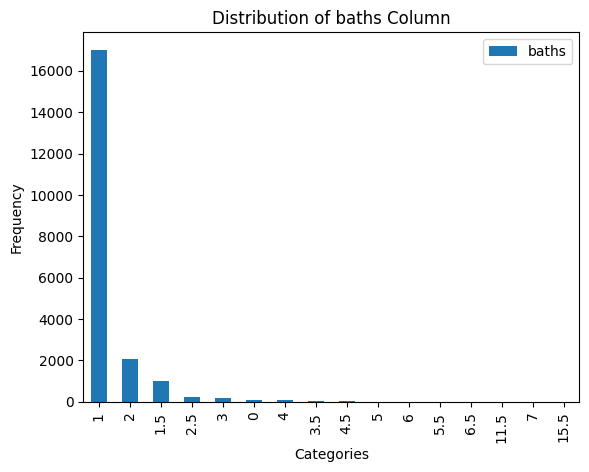

In [ ]:
df["baths"].value_counts().plot(kind='bar', legend=True)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title(f'Distribution of baths Column')
plt.show()

# Distribution of Numerical Features

In [ ]:
# Here is a distribution summary of the min / max / 50% / mean for all the numerical cols
numeric_summary = df.select_dtypes(include='number').describe().transpose()
numeric_summary[['min', 'max', '50%', 'mean']]

,min,max,50%,mean
price,10.00,100000.00,125.00,187.827718
minimum_nights,1.00,1250.00,30.00,28.560328
number_of_reviews,1.00,1865.00,14.00,42.647722
reviews_per_month,0.01,75.49,0.65,1.258118
calculated_host_listings_count,1.00,713.00,2.00,18.850856
availability_365,0.00,365.00,215.00,206.020631
number_of_reviews_ltm,0.00,1075.00,3.00,10.854375
rating,1.75,5.00,4.81,4.747933
beds,1.00,42.00,1.00,1.724174
room_type_Entire home/apt,0.00,1.00,1.00,0.556712


In [ ]:
# specifically encode whether or not the value of "bedroom" was "studio", since we reason studio apartments don't have a bedroom,
# but are in their own unique situation, hence giving them their own column

df['studio'] = (df['bedrooms'] == 'Studio')
df['bedrooms'].replace('Studio', '0', inplace=True)

# convert value from string to floats, since there is no more "studio" value
df['bedrooms'] = df['bedrooms'].apply(float)

In [ ]:
encoded_neighborhoodgroup_df = pd.get_dummies(df, columns=['neighbourhood_group'])
df = encoded_neighborhoodgroup_df.copy()

In [ ]:
# Our new list of columns after one hot encodings
df.columns

Index(['host_name', 'neighbourhood', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license', 'rating', 'bedrooms', 'beds',
       'baths', 'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'studio',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island'],
      dtype='object')

# Normalization

In [ ]:
df[:5]

,host_name,neighbourhood,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,...,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,studio,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
1,Jeniffer,Hell's Kitchen,144.0,30,9,2023-05-01,0.24,139,364,2,...,1,0,0,0,False,0,0,1,0,0
2,Joshua,Chelsea,187.0,2,6,2023-12-18,1.67,1,343,6,...,1,0,0,0,False,0,0,1,0,0
3,John And Catherine,Washington Heights,120.0,30,156,2023-09-17,1.38,2,363,12,...,0,0,1,0,False,0,0,1,0,0
4,Stay With Vibe,Murray Hill,85.0,30,11,2023-12-03,0.24,133,335,3,...,1,0,0,0,True,0,0,1,0,0
5,Jeniffer,Hell's Kitchen,115.0,30,5,2023-07-29,0.16,139,276,2,...,1,0,0,0,False,0,0,1,0,0


In [ ]:
housingcolumnnames = ['minimum_nights',
                      'number_of_reviews',
                      'reviews_per_month',
                      'calculated_host_listings_count',
                      'rating',
                      'bedrooms',
                      'beds',
                      'baths',
                      'neighbourhood_group_Bronx',
                      'neighbourhood_group_Brooklyn',
                      'neighbourhood_group_Manhattan',
                      'neighbourhood_group_Queens',
                      'neighbourhood_group_Staten Island',
                      'room_type_Entire home/apt',
                      'room_type_Hotel room',
                      'room_type_Private room',
                      'room_type_Shared room',]
housingtargetname = ['price']

In [ ]:
X = df[housingcolumnnames]
X[:5]

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,rating,bedrooms,beds,baths,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
1,30,9,0.24,139,4.67,2.0,1,1,0,0,1,0,0,1,0,0,0
2,2,6,1.67,1,4.17,1.0,2,1,0,0,1,0,0,1,0,0,0
3,30,156,1.38,2,4.64,1.0,1,1,0,0,1,0,0,0,0,1,0
4,30,11,0.24,133,4.91,0.0,1,1,0,0,1,0,0,1,0,0,0
5,30,5,0.16,139,5.00,1.0,1,1,0,0,1,0,0,1,0,0,0


In [ ]:
df.shape

(20745, 25)

In [ ]:
# Eliminating outlier data points for price
newdf = df[df['price'] < 1000]
newdf.shape

(20547, 25)

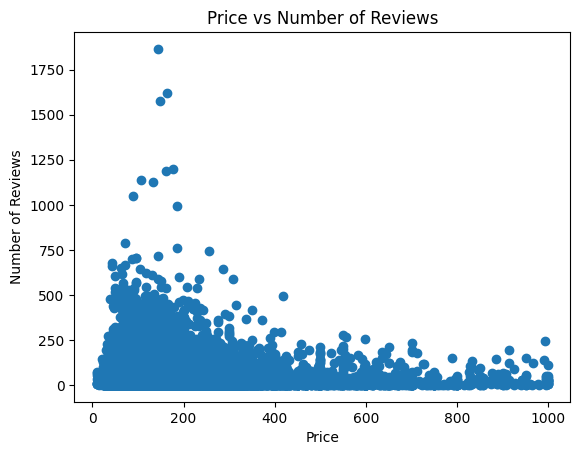

In [ ]:
plt.scatter(newdf['price'], newdf['number_of_reviews'])
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Price vs Number of Reviews')

plt.show()

In [ ]:
X = newdf[housingcolumnnames]

In [ ]:
# normalizing our feature columns using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(X), columns=housingcolumnnames)
norm_df.shape

(20547, 17)

# Milestone 3: Model 1

## Spliting the Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
housing_df = norm_df

In [ ]:
X = housing_df[housingcolumnnames]
X[:5]

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,rating,bedrooms,beds,baths,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.023219,0.004292,0.003047,0.193820,0.898462,0.222222,0.000000,0.086957,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000801,0.002682,0.021993,0.000000,0.744615,0.111111,0.076923,0.086957,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.023219,0.083155,0.018151,0.001404,0.889231,0.111111,0.000000,0.086957,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.023219,0.005365,0.003047,0.185393,0.972308,0.000000,0.000000,0.086957,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.023219,0.002146,0.001987,0.193820,1.000000,0.111111,0.000000,0.086957,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
y = newdf['price']
y[:5]

1    144.0
2    187.0
3    120.0
4     85.0
5    115.0
Name: price, dtype: float64

In [ ]:
# Here we partition the data 80% training 10% validation 10% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
X_train.shape

(16437, 17)

In [ ]:
X_val.shape

(2055, 17)

In [ ]:
X_test.shape

(2055, 17)

In [ ]:
y_train.shape

(16437,)

In [ ]:
y_val.shape

(2055,)

In [ ]:
y_test.shape

(2055,)

## Linear Regression Model
For our first model, we opted to choose Linear Regression to test as our baseline model.

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
regmodel = reg.fit(X_train, y_train)

In [ ]:
yhat_train = reg.predict(X_train)
yhat_val = reg.predict(X_val)
yhat_test = reg.predict(X_test)

In [ ]:
yhat_train[:5]

array([219. ,  60. , 279. , 141. ,  99.5])

In [ ]:
y_train[:5]

12447    450.0
6295      48.0
6942     204.0
17070    106.0
19692     55.0
Name: price, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
print("Training MSE: ", mean_squared_error(yhat_train, y_train))

Training MSE:  10760.671655411572


In [ ]:
print("Validation MSE:", mean_squared_error(y_val, yhat_val))
# print("R-squared on Validation Set:", r2_score(y_val, y_val_pred))

Validation MSE: 9347.664355231143


In [ ]:
print("Testing MSE: ", mean_squared_error(yhat_test, y_test))

Testing MSE:  10208.994525547445


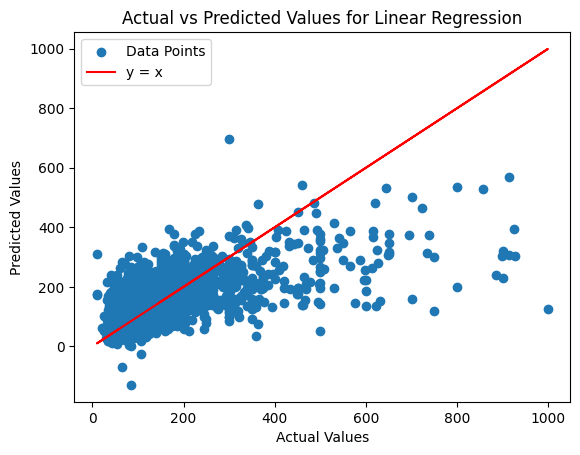

In [ ]:
# This plot shows our actual vs predicted target values with the line y=x representing predictions with no error
plt.scatter(y_test, yhat_test, label='Data Points')
plt.plot(y_test, y_test, color='red', label='y = x')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Linear Regression')

plt.legend()
plt.show()

## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_4features = PolynomialFeatures(degree=4)
poly_4features_xtrain = poly_4features.fit_transform(X_train)
poly_4features_xtest = poly_4features.transform(X_test)
poly_4reg_model = LinearRegression()
poly_4reg_model.fit(poly_4features_xtrain, y_train)

#4 degree training MSE
y_4predicted_train = poly_4reg_model.predict(poly_4features_xtrain)
print("Degree = 4, Training MSE: ", mean_squared_error(y_train, y_4predicted_train))
#4 degree testing MSE
y_4predicted_test = poly_4reg_model.predict(poly_4features_xtest)
print("Degree = 4, Testing MSE: ", mean_squared_error(y_test, y_4predicted_test))

Degree = 4, Training MSE:  7513.000506446608
Degree = 4, Testing MSE:  4.496952953456398e+19


# Milestone 4: Model 2

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
regressor_model = Sequential()

regressor_model.add(Dense(units = 128, activation = 'linear', input_dim = X_train.shape[1]))
regressor_model.add(Dense(units = 64, activation = 'linear'))
regressor_model.add(Dense(units = 32, activation = 'linear'))
regressor_model.add(Dense(units = 16, activation = 'linear'))
regressor_model.add(Dense(units = 8, activation = 'linear'))
regressor_model.add(Dense(units = 1))

In [ ]:
regressor_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2304      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13313 (52.00 KB)
Trainable params: 13313 (

In [ ]:
history = regressor_model.fit(X_train.astype(float), y_train, batch_size = 10, epochs = 75)

Epoch 1/75
1644/1644 [==============================] - 5s 3ms/step - loss: 10993.2227
Epoch 2/75
1644/1644 [==============================] - 8s 5ms/step - loss: 10995.2031
Epoch 3/75
1644/1644 [==============================] - 6s 4ms/step - loss: 10976.4023
Epoch 4/75
1644/1644 [==============================] - 5s 3ms/step - loss: 10951.9424
Epoch 5/75
1644/1644 [==============================] - 4s 3ms/step - loss: 10931.4482
Epoch 6/75
1644/1644 [==============================] - 6s 4ms/step - loss: 10945.1494
Epoch 7/75
1644/1644 [==============================] - 4s 3ms/step - loss: 10908.8975
Epoch 8/75
1644/1644 [==============================] - 6s 4ms/step - loss: 10912.0049
Epoch 9/75
1644/1644 [==============================] - 5s 3ms/step - loss: 10954.3809
Epoch 10/75
1644/1644 [==============================] - 5s 3ms/step - loss: 10955.0098
Epoch 11/75
1644/1644 [==============================] - 6s 3ms/step - loss: 10933.8984
Epoch 12/75
1644/1644 [==================

In [ ]:
yhat_test = regressor_model.predict(X_test.astype(float))
yhat_test

65/65 [==============================] - 0s 2ms/step


array([[ 96.00795 ],
       [ 43.193966],
       [100.914314],
       ...,
       [135.81802 ],
       [ 85.01315 ],
       [131.63052 ]], dtype=float32)

In [ ]:
yhat_train = regressor_model.predict(X_train.astype(float))
yhat_train

514/514 [==============================] - 1s 2ms/step


array([[235.02051 ],
       [ 70.430626],
       [288.99402 ],
       ...,
       [ 88.74135 ],
       [246.49106 ],
       [151.29048 ]], dtype=float32)

In [ ]:
y_test = np.array(y_test)
y_train = np.array(y_train)

print("Test MSE: ", mean_squared_error(y_test, yhat_test))

print("Train MSE: ", mean_squared_error(y_train, yhat_train))

Test MSE:  10338.206555135377
Train MSE:  10891.356898237822


In [ ]:
pip install scikeras

In [ ]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from scikeras.wrappers import KerasRegressor

estimator = KerasRegressor(model=regressor_model, epochs=20, batch_size=100, verbose=0)
kfold = RepeatedKFold(n_splits = 10, n_repeats = 5)

results = cross_val_score(estimator, X_train, y_train, cv=kfold, n_jobs = 1, scoring = 'neg_mean_squared_error')

In [ ]:
# Mean MSE for all splits and repeated runs.
print("Validation MSE: ", results.mean())

Validation MSE:  -10804.886226606804


## Hyper Parameter Tuning

In [111]:
!pip install keras_tuner
import keras_tuner

In [112]:
from tensorflow.keras.optimizers import Adam

In [113]:
# Tune units, activation function, and learning rate to use
def buildHPmodel(hp):
  model= Sequential([
      Dense(12, activation = 'linear', input_dim = X_train.shape[1]),
      Dense(
              units=hp.Int("units", min_value=32, max_value=512, step=32),
              activation=hp.Choice("activation", ["tanh","relu", "linear"]),
      ),
      Dense(
              units=hp.Int("units", min_value=32, max_value=512, step=32),
              activation=hp.Choice("activation", ["tanh","relu", "linear"]),
      ),
      Dense(
              units=hp.Int("units", min_value=32, max_value=512, step=32),
              activation=hp.Choice("activation", ["tanh","relu", "linear"]),
      ),
      Dense(1, activation = 'linear')
])
  learning_rate = hp.Choice("learning_rate", values=[0.01, 0.1, 0.3]),
  model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mse'])
  return model

In [114]:
hp = keras_tuner.HyperParameters()

In [115]:
tuner = keras_tuner.GridSearch(
    hypermodel=buildHPmodel,
    objective="val_mse",
    max_trials=10,
    seed=15,
    executions_per_trial=5,
    tune_new_entries=True,
    allow_new_entries=True,
    max_consecutive_failed_trials=3
)

Reloading Tuner from ./untitled_project/tuner0.json


In [116]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'relu', 'tanh'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.1, 0.3], 'ordered': True}


In [117]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 0)
tuner.search(X_train, y_train, epochs=10, batch_size = 50, validation_data=(X_val, y_val), verbose = 0)

In [118]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_mse", direction="min")

Trial 07 summary
Hyperparameters:
units: 32
activation: tanh
learning_rate: 0.1
Score: 40948.52734375

Trial 06 summary
Hyperparameters:
units: 32
activation: tanh
learning_rate: 0.01
Score: 40948.52734375

Trial 02 summary
Hyperparameters:
units: 32
activation: sigmoid
learning_rate: 0.3
Score: 40948.52734375

Trial 04 summary
Hyperparameters:
units: 32
activation: relu
learning_rate: 0.1
Score: 40948.52734375

Trial 05 summary
Hyperparameters:
units: 32
activation: relu
learning_rate: 0.3
Score: 40948.52734375

Trial 03 summary
Hyperparameters:
units: 32
activation: relu
learning_rate: 0.01
Score: 40948.52734375

Trial 00 summary
Hyperparameters:
units: 32
activation: sigmoid
learning_rate: 0.01
Score: 40948.52734375

Trial 09 summary
Hyperparameters:
units: 64
activation: sigmoid
learning_rate: 0.01
Score: 40948.52734375

Trial 01 summary
Hyperparameters:
units: 32
activa

In [119]:
models = tuner.get_best_models(num_models=1)
models[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                216       
                                                                 
 dense_1 (Dense)             (None, 32)                416       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2777 (10.85 KB)
Trainable params: 2777 (10.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [120]:
yhat_test = models[0].predict(X_test.astype(float))
yhat_test

65/65 [==============================] - 1s 9ms/step


array([[43.565132],
       [43.579216],
       [43.560097],
       ...,
       [43.755066],
       [43.559303],
       [43.706352]], dtype=float32)

In [121]:
yhat_train = models[0].predict(X_train.astype(float))
yhat_train

163/163 [==============================] - 2s 13ms/step


array([[43.68734 ],
       [43.705612],
       [43.57289 ],
       ...,
       [43.674576],
       [43.74521 ],
       [43.729668]], dtype=float32)

In [122]:
yhat_val = models[0].predict(X_val.astype(float))
yhat_val

55/55 [==============================] - 0s 7ms/step


array([[43.560234],
       [43.684692],
       [43.677483],
       ...,
       [43.7408  ],
       [43.691284],
       [43.742523]], dtype=float32)

In [123]:
y_test = np.array(y_test)
y_train = np.array(y_train)
y_val = np.array(y_val)

print("Test MSE: ", mean_squared_error(y_test, yhat_test))

print("Train MSE: ", mean_squared_error(y_train, yhat_train))
print("Validation MSE: ", mean_squared_error(y_val, yhat_val))

Test MSE:  28502.17003933857
Train MSE:  31635.010737238714
Validation MSE:  31114.77746357415


# Milestone 5

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)

# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=0)

In [ ]:
yhat_test = regressor.predict(X_test.astype(float))
yhat_test

array([ 89.585     ,  40.58      , 121.0752381 , ..., 277.8075    ,
        55.10666667, 251.46      ])

In [ ]:
yhat_train = regressor.predict(X_train.astype(float))
yhat_train

array([372.1 ,  49.95, 239.91, ...,  47.74, 153.24, 132.16])

In [ ]:
y_test = np.array(y_test)
y_train = np.array(y_train)

print("Test MSE: ", mean_squared_error(y_test, yhat_test))

print("Train MSE: ", mean_squared_error(y_train, yhat_train))

Test MSE:  8158.552072786882
Train MSE:  1510.2902779701878


In [ ]:
results = cross_val_score(regressor, X_train, y_train, cv=kfold, n_jobs = 1, scoring = 'neg_mean_squared_error')

In [ ]:
# Mean MSE for all splits and repeated runs.
print("Validation MSE: ", results.mean())

Validation MSE:  -9327.000612329275
